In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import re
import nltk

In [2]:
#Importing both the real and fake data
true_data = pd.read_csv('true.csv')
fake_data = pd.read_csv('fake.csv')


In [5]:
#First let's add a coloumn called 'True' in the true data and 'False' in fake data
for i in range(len(true_data)):
    true_data['results'] = 'Real'
for i in range(len(fake_data)):
    fake_data['results'] = 'Fake'

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64
-------*-------
politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


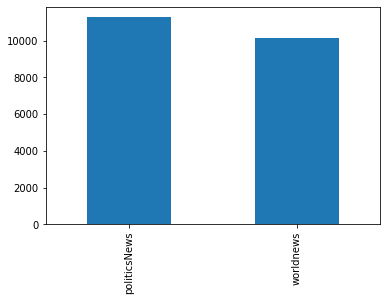

In [28]:
#Let's count and plot the subject of the text category
true_subject = true_data['subject'].value_counts()
fake_subject = fake_data['subject'].value_counts()
print(fake_subject)
print('-------*-------')
print(true_subject)
#Looks like there are more subjects on the fake news and less content on the true news

#Plotting the data out
true_subject.plot(kind = 'bar')

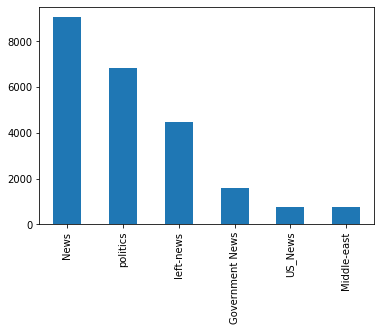

In [29]:
fake_subject.plot(kind = 'bar')

In [33]:
#Joining dtext and title in one column to create the news article
true_data['News'] = true_data['title'] + ' ' + true_data['text']
fake_data['News'] = fake_data['title'] + ' '+ true_data['text']

In [36]:
#Deleting title and text from both dataframe
del true_data['title']
del true_data['text']
del fake_data['title']
del fake_data['text']

In [73]:
#Tokenizing,stemming and lemitization on the News coloumn
nltk.download('stopwords')
from nltk.corpus import stopwords #Importing the stopwords to remove the stepwords using nltk stopwords library
from nltk.stem.porter import PorterStemmer #Using porterstemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shikharghimire/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [90]:
ps = PorterStemmer()
lem = nltk.stem.WordNetLemmatizer()

def token_stem_lemm(data,coloumn,corpus_name):
    corpus_name = []
    for i in range(len(data)):
        news = re.sub('[^a-zA-Z]','',data['coloumn'][i]) #Keeping all the text messages represented and removing everything else
        news = news.lower() #Converting all the strings into lowercase
        news = news.split() #Splitting every string in words
        news = [ps.stem(words) for words in news if not words in set(stopwords.words('english'))]#Checks if the word contains in it matches with the stopwords or not. If not, it goes ahead and stems those words
        news = [lem.lemmatize(words) for words in news]
        news = ''.join(news) #Reversing it back to non list string as above method 'string' would have stringed 
        corpus_name.append(news)

In [91]:
true_corpus = []
fake_corpus = []
token_stem_lemm(true_data,'News',true_corpus)

KeyError: 'coloumn'